In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
# import uniform distribution
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import norm
import scipy.special as sc
import scipy.optimize
from scipy.optimize import fsolve
from scipy.stats import pareto
import time
np.random.seed(5)

In [2]:
def auction_exp(data_auction, p):
    """auction experiment simulation

    Args:
        data_auction: random sample data for auction simulation
        p: the reserve price
        
    Return:
        revenue: the expected revenue
    """
    revenue = 0
    for bid in data_auction:
        if bid >= p:
          #change the bidder with price p
          revenue += p
    
    revenue = revenue/len(data_auction)
    return revenue

In [3]:
def rejection_sampling(pi1, pi2, N):
    """rejection sampling algorithm

    Args:
        pi1,pi2: the range of log-lottery distribution
        N: the number of samples from the log-lottery distribution
        
    Return:
        rej_sample: The random samples from the log-lottery distribution
    """

    #using rejection sampling, get N random price samples
    n = 0
    don = pi2*np.log(pi2/pi1) - (pi2-pi1)
    env =(pi2/pi1-1)/don
    rej_sample =[]
    while(n <= N):
        x = uniform.rvs(loc=pi1, scale=pi2-pi1)
        #a is acception probability
        a = (pi2/x-1)/don/env
        u1 = uniform.rvs()
        if (u1 <= a):
            rej_sample.append(x)
            n += 1
    return rej_sample

In [20]:
# Experiment deterministic and randomized auctions for single-item and single-bidder case with Pareto(0) distribution:
#Test performance of numertical solver and thus adjust the initial starting point#################################

#Definition 3.1: rho_D function used to compute DAPX
def rho_D(x):
    return ((x-1)**3)/((2*x-1)**2) - r**2   

#Definition 5.1:  rho function used to compute the APX theoretical upper bound
def random_rho(x):
    return ((2*np.exp(x-1)-1)-(x**2)*r**2 - x**2)

#Function f used to solve pi1 for log-lottery distribution
def f(x):
    return (x * (1 + np.log(k2/(x**2) + 1) - np.log(2)) -u )


n = 100000
step = np.linspace(1.0001, 10, 50) 
tic = time.clock()
for i in step:
    
    c = 2*i**2/(i**2-1)
    u, var = pareto.stats(c, moments='mv')
    sigma = np.sqrt(var)
    u = u-1
    r = sigma/u
   
   
    #use numerical solver to solve the ratio value, then compute the reserve price
    p_d = fsolve(rho_D, [u+1])
    print(rho_D(p_d))
   
    
    #First solve pi1 and pi2 using numerical solver and then generate the samples from 
    #the corresponding log-lottery distribution.
    k2 = u**2 + sigma**2
    pi1 = fsolve(f, [u-0.1])
    pi2 = 0.5*(k2/pi1 +pi1)
    print(f(pi1))
    
    #compute the APX theoretical upper bound using function rho from Definition 4.1
    r_rho = fsolve(random_rho, [u+10])
    r_rho_list.append(r_rho[0])
    print(random_rho(r_rho))


[2.22044605e-16]
[-1.35525272e-20]
[7.10542736e-15]
[1.11022302e-15]
[2.77555756e-17]
[7.10542736e-15]
[-4.4408921e-16]
[0.]
[1.27897692e-13]
[0.]
[5.55111512e-17]
[2.48689958e-14]
[-1.33226763e-15]
[0.]
[1.72981629e-11]
[0.]
[0.]
[1.70530257e-13]
[-8.8817842e-16]
[0.]
[7.10542736e-15]
[0.]
[6.43929354e-15]
[-7.10542736e-15]
[0.]
[1.99840144e-15]
[3.20454774e-12]
[8.8817842e-16]
[7.77156117e-16]
[1.13686838e-13]
[0.]
[2.22044605e-16]
[8.52651283e-14]
[0.]
[1.11022302e-16]
[2.79584356e-10]
[-1.77635684e-15]
[1.11022302e-16]
[1.47934998e-11]
[1.77635684e-15]
[0.]
[5.1159077e-13]
[0.]
[0.]
[1.77635684e-13]
[0.]
[1.11022302e-16]
[-1.56319402e-13]
[1.77635684e-15]
[1.11022302e-16]
[6.1094596e-10]
[0.]
[-1.11022302e-16]
[5.98987526e-11]
[3.55271368e-15]
[0.]
[5.27933253e-12]
[-3.55271368e-15]
[-1.11022302e-16]
[1.70530257e-13]
[3.55271368e-15]
[-1.11022302e-16]
[-7.10542736e-14]
[3.55271368e-15]
[0.]
[4.61852778e-13]
[-3.55271368e-15]
[-2.22044605e-16]
[4.40536496e-13]
[3.55271368e-15]
[-2.2

C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [33]:
# Experiment deterministic for single-item and single-bidder case with Pareto(0) distribution first:
DAPX_pareto0 = []
r_list =[]
p_reserve_list = []
p_d_list = []
c_list=[]


#Definition 3.1: rho_D function used to compute DAPX
def rho_D(x):
    return ((x-1)**3)/((2*x-1)**2) - r**2   

#Definition 5.1:  rho function used to compute the APX theoretical upper bound
def random_rho(x):
    return ((2*np.exp(x-1)-1)-(x**2)*r**2 - x**2)

#Function f used to solve pi1 for log-lottery distribution
def f(x):
    return (x * (1 + np.log(k2/(x**2) + 1) - np.log(2)) -u )

# for DAPX we pick a large n for stable result
n = 10000000
step = np.linspace(1.0001, 10, 50) 
tic = time.clock()
for i in step:
    c = 2*i**2/(i**2-1)
    c_list.append(c)
    u, var = pareto.stats(c, moments='mv')
    sigma = np.sqrt(var)
    u = u-1
    r = sigma/u
    r_list.append(r)
    
    
    bid_pareto= pareto.rvs(c,size=n)
    #use numerical solver to solve the ratio value, then compute the reserve price
    p_d = fsolve(rho_D, [u+1])
    print(rho_D(p_d))
    p_d_list.append(p_d)
    p_reserve = p_d*u/(2*p_d-1)
    p_reserve_list.append(p_reserve)
    #Expertiment Giannakopoulos et al. auction
    exp_revenue = auction_exp(bid_pareto-1,p_reserve)
    ###############################################################################
    #Following we experiment the optimal auction for Pareto(0) distribution
    opt_p = 1/(c-1)
    opt_revenue = auction_exp(bid_pareto-1,opt_p)
    ###############################################################################
    #Compute the experimental DAPX
    DAPX_pareto0.append((opt_revenue/exp_revenue)[0]) 
    
toc = time.clock()
print('time: ' + str(toc-tic))



C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


[2.22044605e-16]
[1.11022302e-15]
[-4.4408921e-16]
[0.]
[-1.33226763e-15]
[0.]
[-8.8817842e-16]
[0.]
[0.]
[8.8817842e-16]
[0.]
[0.]
[-1.77635684e-15]
[1.77635684e-15]
[0.]
[0.]
[1.77635684e-15]
[0.]
[3.55271368e-15]
[-3.55271368e-15]
[3.55271368e-15]
[3.55271368e-15]
[-3.55271368e-15]
[3.55271368e-15]
[0.]
[3.55271368e-15]
[0.]
[0.]
[0.]
[0.]
[0.]
[7.10542736e-15]
[0.]
[7.10542736e-15]
[0.]
[-7.10542736e-15]
[-7.10542736e-15]
[7.10542736e-15]
[-7.10542736e-15]
[1.42108547e-14]
[-1.42108547e-14]
[1.42108547e-14]
[0.]
[-1.42108547e-14]
[0.]
[0.]
[-1.42108547e-14]
[0.]
[-1.42108547e-14]
[0.]
time: 949.3258511000022


C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:52: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


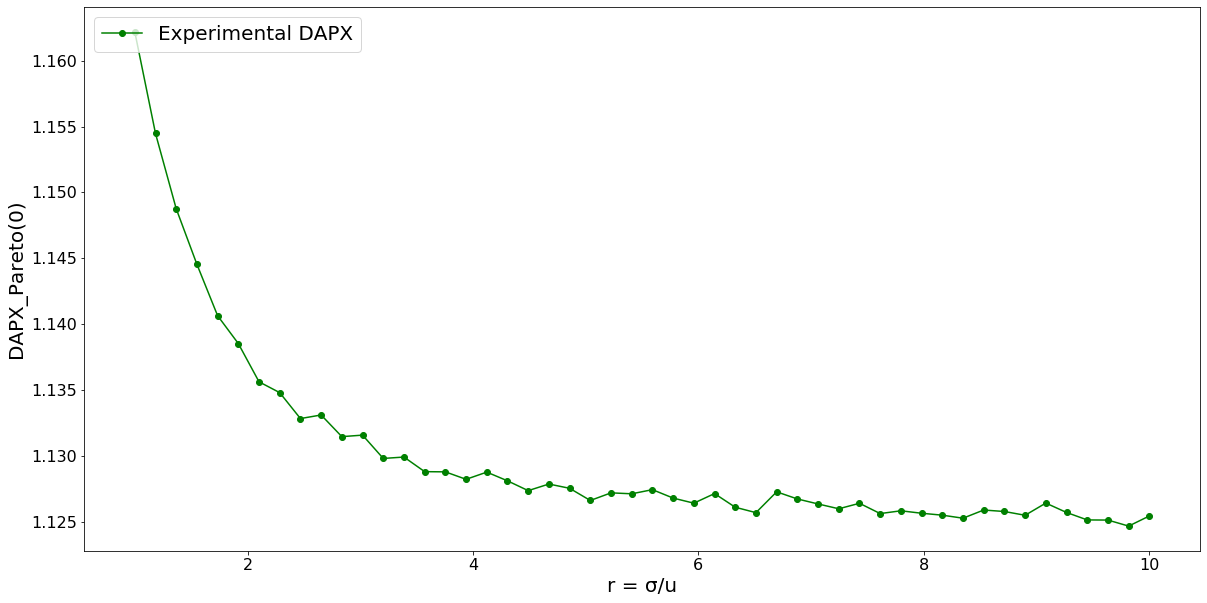

In [34]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))
# make a plot
ax.plot(r_list, DAPX_pareto0,color="green",marker="o",label="Experimental DAPX")
# set x-axis label
ax.set_xlabel("r = \u03C3/u",fontsize=20)
# set y-axis label
ax.set_ylabel("DAPX_Pareto(0)",fontsize=20)
#ax.set_ylim(1.12,1.17)
#ax.plot(r_list, p_d_list,color="blue",marker="o",label="Theoritical \u03C1_D")
ax.tick_params(axis='x', labelsize= 16)
ax.tick_params(axis='y', labelsize= 16)

plt.legend(loc="upper left",fontsize = 20)
#plt.savefig("pareto0_dapx_only.png",bbox_inches='tight')
plt.show()


In [ ]:
# Experiment the randomized auction for single-item and single-bidder case with Pareto(0) distribution:
r_list =[]
c_list=[]
APX_pareto0 = []
r_rho_list = []


#Definition 3.1: rho_D function used to compute DAPX
def rho_D(x):
    return ((x-1)**3)/((2*x-1)**2) - r**2   

#Definition 5.1:  rho function used to compute the APX theoretical upper bound
def random_rho(x):
    return ((2*np.exp(x-1)-1)-(x**2)*r**2 - x**2)

#Function f used to solve pi1 for log-lottery distribution
def f(x):
    return (x * (1 + np.log(k2/(x**2) + 1) - np.log(2)) -u )


n = 100000
step = np.linspace(1.0001, 10, 50) 
tic = time.clock()
for i in step:
    c = 2*i**2/(i**2-1)
    c_list.append(c)
    u, var = pareto.stats(c, moments='mv')
    sigma = np.sqrt(var)
    u = u-1
    r = sigma/u
    r_list.append(r)
    
    bid_pareto= pareto.rvs(c,size=n)
    ###############################################################################
    #Following we experiment the optimal auction for Pareto(0) distribution
    opt_p = 1/(c-1)
    opt_revenue = auction_exp(bid_pareto-1,opt_p)
    ###############################################################################

    
    #First solve pi1 and pi2 using numerical solver and then generate the samples from 
    #the corresponding log-lottery distribution.
    k2 = u**2 + sigma**2
    pi1 = fsolve(f, [u-0.1])
    pi2 = 0.5*(k2/pi1 +pi1)
    print(f(pi1))
    rej_sample = []
    rej_sample = rejection_sampling(pi1,pi2,10000)
    rexp_revenue_list = []
    #For each reserve price, perform auction experiment and save all the results
    for rp_reserve in rej_sample:
        rexp_revenue_list.append(auction_exp(bid_pareto-1,rp_reserve))
    #Determine the experimental APX with optimal revenue against the average revenue
    APX_pareto0.append(opt_revenue/np.average(rexp_revenue_list))
    
    #compute the APX theoretical upper bound using function rho from Definition 4.1
    r_rho = fsolve(random_rho, [u])
    r_rho_list.append(r_rho[0])
    print(random_rho(r_rho))


toc = time.clock()
print('time: ' + str(toc-tic))



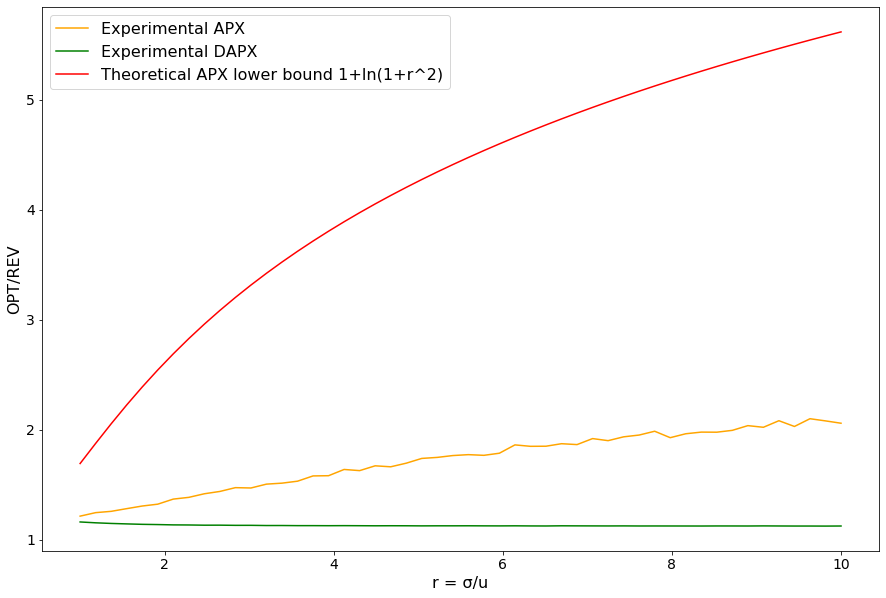

In [35]:
plt.figure(figsize=(15,10))
plt.tick_params(axis='x', labelsize= 14)
plt.tick_params(axis='y', labelsize= 14)
plt.xlabel("r = \u03C3/u",fontsize=16)
plt.ylabel("OPT/REV",fontsize=16)
plt.plot(r_list, APX_pareto0,color="#FFA500",label="Experimental APX")
plt.plot(r_list, DAPX_pareto0,color="green",label="Experimental DAPX")

lower_bound = 1+np.log(1+np.power(r_list,2))
#plt.plot(r_list, ratio,color="blue",label="worst case rho_d")
plt.plot(r_list, lower_bound,color="red",label="Theoretical APX lower bound 1+ln(1+r^2)")
plt.legend(loc="upper left",fontsize = 16)
#plt.savefig("apxpareto0.png",bbox_inches='tight')
plt.show()

C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


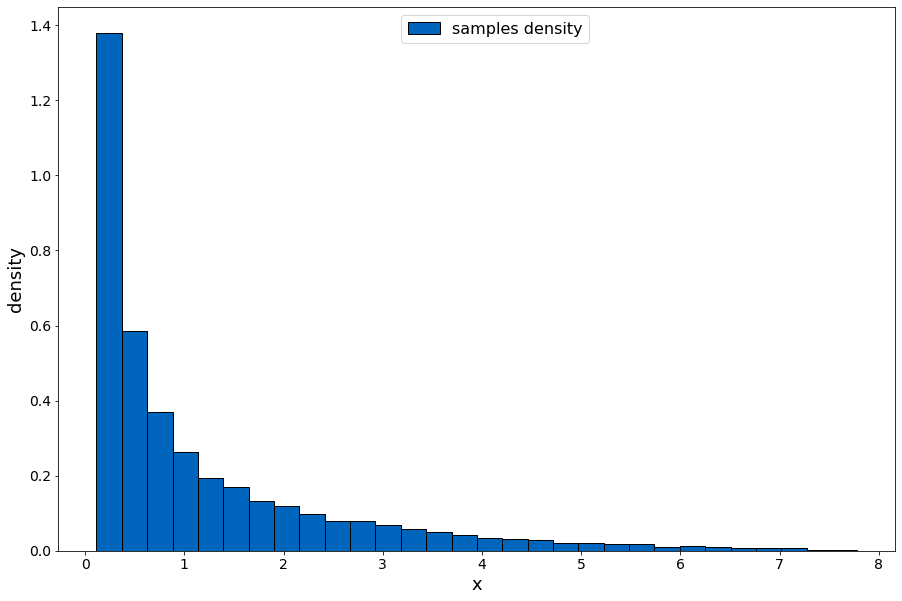

In [20]:
lower_bound = 1+np.log(1+np.power(r_list0,2))
# creating the DataFrame 
my_df = { 'r' : r_list,
          'DAPX_pareto': DAPX_pareto,
         'theoretical DAPX':p_d_list,
         'APX_pareto': APX_pareto,
         'upper_bound':r_rho_list,
         'lower_bound':lower_bound
         } 
df = pd.DataFrame(my_df) 
  

gfg_csv_data = df.to_csv('apx_pareto0.csv', index = True) 
print('\nCSV String:\n', gfg_csv_data) 